In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Hp\\Downloads\\Python'

In [3]:
# Importing height weight csv
df = pd.read_csv('C:\\Users\\Hp\\Downloads/Height_Weight.csv')
df

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157
...,...,...,...,...
194,65,M,97,189
195,30,M,101,183
196,54,M,102,185
197,97,M,103,185


In [4]:
# To Find the datatypes of each column in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      199 non-null    int64 
 1   gender  199 non-null    object
 2   weight  199 non-null    int64 
 3   height  199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [6]:
# Let's look at some statistical information about our dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,199.0,100.944724,57.681571,1.0,51.5,101.0,150.5,200.0
weight,199.0,65.195980,13.008031,39.0,55.0,63.0,73.5,103.0
height,199.0,170.587940,8.948848,148.0,164.0,170.0,177.5,197.0


In [7]:
# Statistical Information about Categorical Columns
df.describe(include='object')

,gender
count,199
unique,2
top,F
freq,111


In [8]:
# Dropping 'id' column as it is unique identification for each row
df.drop(['id'], axis = 1,inplace=True)
df

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157
...,...,...,...
194,M,97,189
195,M,101,183
196,M,102,185
197,M,103,185


In [9]:
# finding missing values in df
df.isnull()

,gender,weight,height
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
194,False,False,False
195,False,False,False
196,False,False,False
197,False,False,False


In [10]:
df.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

In [11]:
# Frequency Matrix of 'Gender' column
df['gender'].value_counts()

F    111
M     88
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

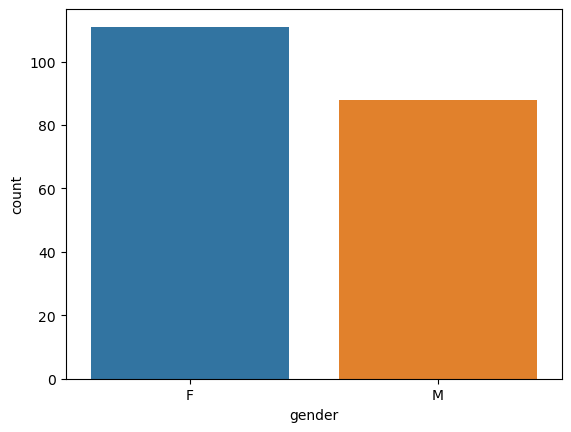

In [12]:
# Bar chart of frequency count (for Male & Female)
sns.countplot(x='gender', data =df)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight', ylabel='height'>

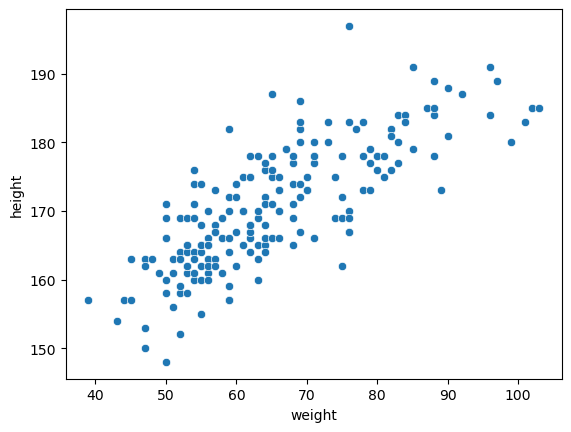

In [13]:
# Looking at the scatterplot between 'height' and 'weight'     # We observe here strong correlation between height and weight.
sns.scatterplot(df['weight'],df['height'])

In [14]:
# Finding correlation coeficient between 'weight' and 'height'   # height and weight are 78% correlated that means highly correlated
df.corr()

,weight,height
weight,1.000000,0.782438
height,0.782438,1.000000


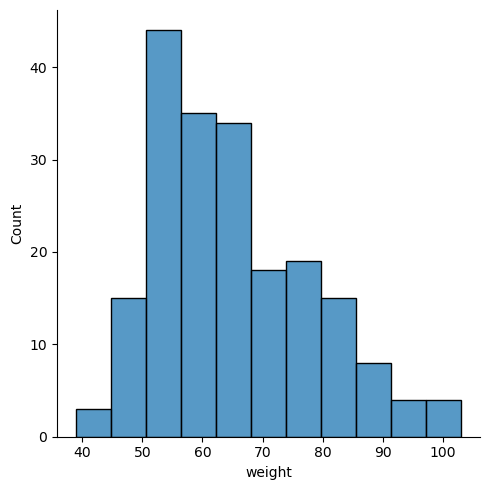

In [15]:
# Distribution plot for 'weight'
sns.displot(df.weight,kind='hist')

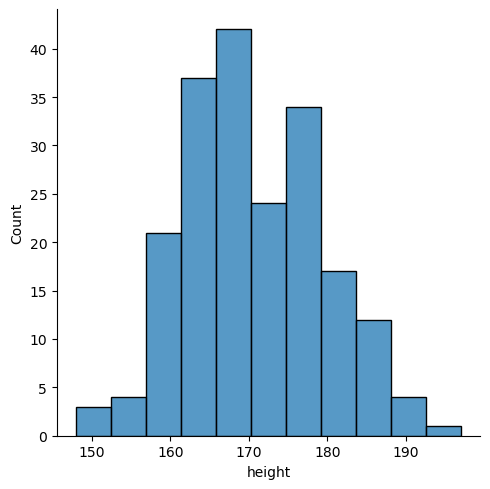

In [16]:
sns.displot(df.height,kind='hist')

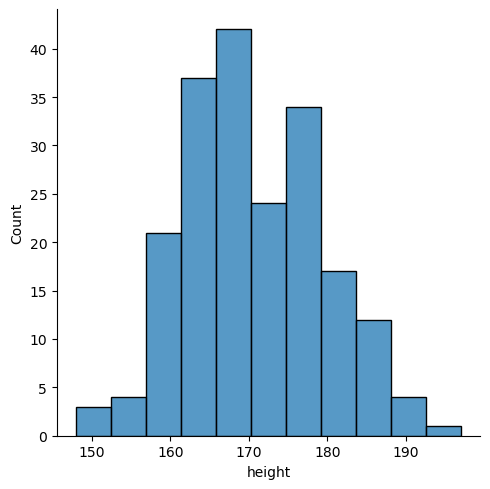

In [17]:
sns.displot(df['height'],kind='hist')

In [50]:
# Skew in the distributiion of 'weight' column
df.weight.skew()  # Moderately skewed

0.7449402052268245

In [51]:
df['weight'].skew()

0.7449402052268245

In [52]:
# Skew in the distribution of 'height' column
df.height.skew()   # Almost symetric

0.2129090698591845

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

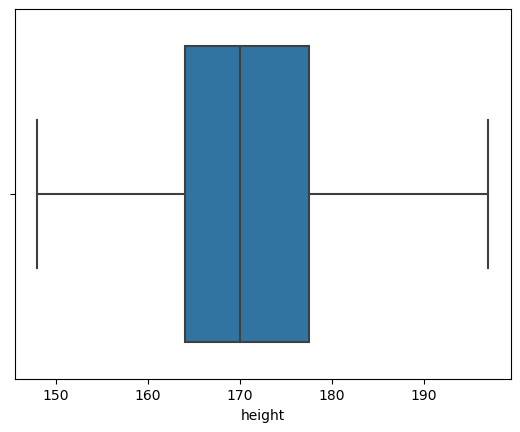

In [21]:
# Outlier detection of 'height' column
sns.boxplot(df['height'])      # No outlier

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

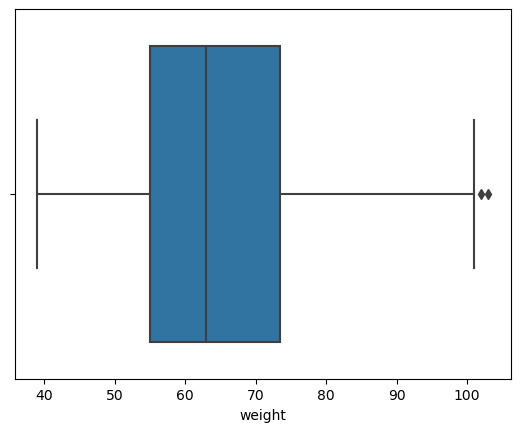

In [22]:
# Outlier detection in 'weight' column
sns.boxplot(df['weight'])   # Here outlier are present but we don't have need to be remove it because wt we have to be predicted

In [23]:
# Assigning independent variable x to 'height'
x=df['height']
x

0      157
1      154
2      157
3      163
4      157
      ... 
194    189
195    183
196    185
197    185
198    180
Name: height, Length: 199, dtype: int64

In [24]:
# Assigning dependent variable y to 'weight'
y=df['weight']
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

In [25]:
# above 'x' will contain all the independent variable and 'y ' will contain all dependent variable
# Gender is catagorical variable hence to include it in 'x ' variable it must be converted into numeric variable
# Therefore we take only height in 'x'

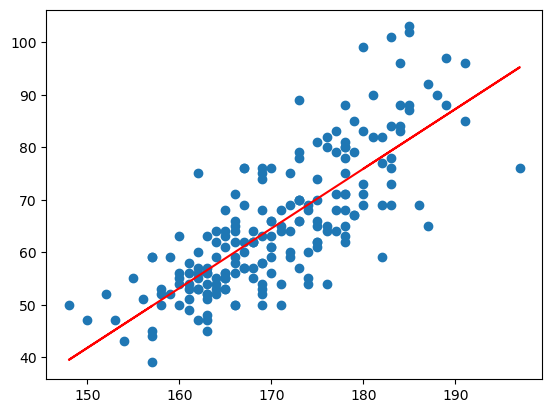

In [26]:
# To plot a linear Regression(Best Fit) line on a scatter plot, using np.polyfit()
import numpy as np
plt.scatter(x,y)
m,b = np.polyfit(x,y,1)     # m- slope, b-intercept
plt.plot(x,m*x + b, 'r')    # we plot x and equation(m*x+b)
                            # r = colur of the line 'red'   1

###### Creation of dummy Variable

In [27]:
# Creating list of numeric columns
df.select_dtypes(include=[np.number]).columns.tolist()

['weight', 'height']

In [28]:
# Creating df of numeric columns
df_num = df[['weight','height']]
df_num

,weight,height
0,39,157
1,43,154
2,44,157
3,45,163
4,45,157
...,...,...
194,97,189
195,101,183
196,102,185
197,103,185


In [29]:
# Creat a list of categorical variable
df.select_dtypes(include=['object']).columns.tolist()

['gender']

In [30]:
# Convert 'gender' column to 'numeric' data by using get dummies 
df_dummies = pd.get_dummies(df['gender'])

In [31]:
df_dummies.tail()

,F,M
194,0,1
195,0,1
196,0,1
197,0,1
198,0,1


In [32]:
# Combine columnwise ,  Appending of column
df_combined = pd.concat([df_num,df_dummies], axis=1)

In [33]:
# Modified dataset
df_combined.head()

,weight,height,F,M
0,39,157,1,0
1,43,154,1,0
2,44,157,1,0
3,45,163,1,0
4,45,157,1,0


In [34]:
# Find missing values
df_combined.isnull().sum()

weight    0
height    0
F         0
M         0
dtype: int64

In [35]:
# Putting feature variable to x (i.e x = dataset after removing Interest rate)
x = df_combined.drop('weight',axis=1)

In [36]:
# Putting reponse variable to 'y'
y = df_combined['weight']

In [37]:
x

,height,F,M
0,157,1,0
1,154,1,0
2,157,1,0
3,163,1,0
4,157,1,0
...,...,...,...
194,189,0,1
195,183,0,1
196,185,0,1
197,185,0,1


In [38]:
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

Spliting the data in Training and Test set Using sklearn we split 80%  of our data into training set and rest in test set. Setting random_state will give the same training and test set everytime on running the code.

In [39]:
# Split the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=12)  #random_state=12 is used to confirm training and testing dataset otherwise it will be change
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((159, 3), (159,), (40, 3), (40,))

###### Performing Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

LinearRegression()

In [42]:
# Fit the model to training data
lm.fit(x_train,y_train)

LinearRegression()

In [43]:
# print the intercept
print(lm.intercept_)

-70.06767245870712


In [44]:
# let see the coefficient
coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,0.795842
F,-4.168111
M,4.168111


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F', ylabel='weight'>

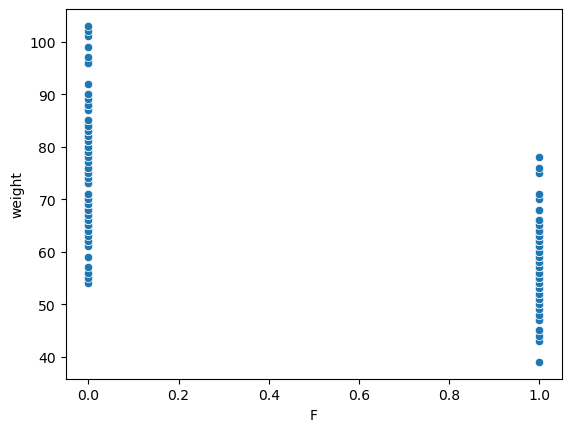

In [45]:
sns.scatterplot(df_combined['F'],df_combined['weight'])

In [46]:
# Making Predictions using the model
y_pred = lm.predict(x_test)
print(y_pred)

[79.73956754 57.87402675 59.46571122 76.55619861 57.87402675 55.48650006
 77.35204085 71.78114522 54.69065782 60.26155345 54.69065782 61.05739568
 82.12709424 43.54886656 51.50728889 67.00609182 83.71877871 62.64908015
 74.96451415 58.66986899 54.69065782 75.76035638 57.07818452 55.48650006
 76.55619861 67.80193405 81.33125201 56.28234229 75.76035638 75.76035638
 74.96451415 75.76035638 73.37282968 57.07818452 69.39361852 48.32391996
 55.48650006 59.46571122 61.05739568 54.69065782]


In [47]:
# Model performance Metrics
#Coefficient of Determination(R square)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared

0.6494219091357308

In [48]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :',mse)
print('Root_Mean_Squared_Error :',rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 57.53950560832534
Root_Mean_Squared_Error : 7.585479919446452
r_square_value : 0.6494219091357308


In [49]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
148,73,79.739568
11,50,57.874027
92,62,59.465711
124,67,76.556199
93,62,57.874027
21,52,55.486500
198,99,77.352041
62,57,71.781145
7,47,54.690658
29,53,60.261553
